In [1]:
import PIL

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Membaca Directory
base_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset'
!ls '/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset'

Class_I  Class_II  Extra_Class


In [4]:
# membuat pathlib untuk memudahkan untuk glob
import pathlib
base_dir = pathlib.Path(base_dir)
base_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset')

In [5]:
# Review Dataset
class_I = list(base_dir.glob('Class_I/*'))
class_I [:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Class_I/IMG_20210703_152813.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Class_I/IMG_20210703_152705.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Class_I/IMG_20210703_154247.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Class_I/IMG_20210703_153138.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Class_I/IMG_20210703_154514.jpg')]

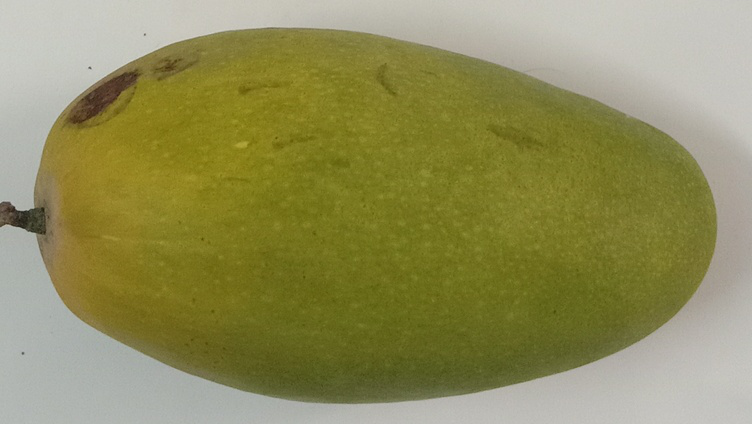

In [6]:
PIL.Image.open(str(class_I[0]))

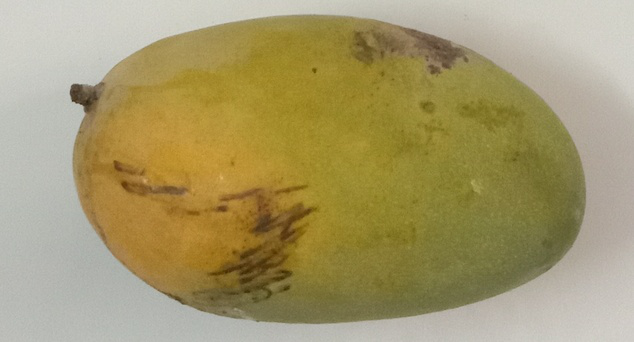

In [7]:
class_II = list(base_dir.glob('Class_II/*'))
PIL.Image.open(str(class_II[0]))

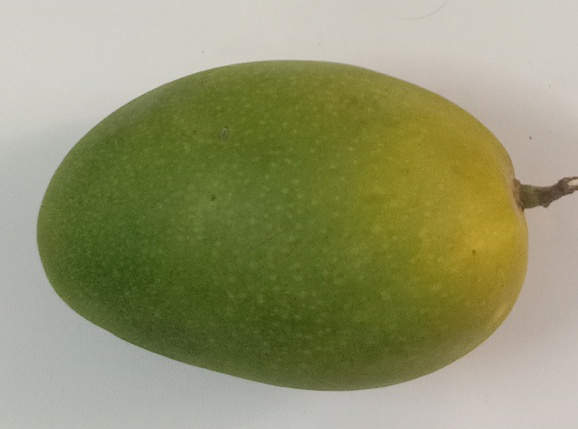

In [8]:
ekstra_class = list(base_dir.glob('Extra_Class/*'))
PIL.Image.open(str(ekstra_class[0]))

In [9]:
# Membuat Directory agar mudah
mango_grading_dict = {
    'class_I': list(base_dir.glob('Class_I/*')),
    'class_II' : list(base_dir.glob('Class_II/*')),
    'ekstra_class' : list(base_dir.glob('Extra_Class/*')),
}

In [10]:
# Membuat label tiap kelas
mango_label_dict = {
    'class_I' : 0,
    'class_II' : 1,
    'ekstra_class' : 2,
}

In [11]:
# Augmentation
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [12]:
datagen = ImageDataGenerator(
        rotation_range=30,     #Random rotation between 0 and 45
        # width_shift_range=0.1,   #% shift
        # height_shift_range=0.1,
        rescale= 1./255,
        shear_range=0.1,
        # zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',)
        # brightness_range = (0.5, 1.5))    #Also try nearest, constant, reflect, wrap

In [13]:
import numpy as np
from skimage import io
import os
from PIL import Image

image_directory = '/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Extra_Class/'
SIZE = 150
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

# x = io.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/Grading_dataset/Class_I/IMG_20210703_151539.jpg')  #Array with shape (256, 256, 3)

# # Reshape the input image because ...
# #x: Input data to datagen.flow must be Numpy array of rank 4 or a tuple.
# #First element represents the number of images
# x = x.reshape((1, ) + x.shape)  #Array with shape (1, 256, 256, 3)

In [14]:
i = 0
for batch in datagen.flow(x, batch_size=200,  
                          save_to_dir='/content/drive/MyDrive/Colab Notebooks/Dataset/mangga/augmentasi2/Ekstra_Class/', 
                          save_prefix='aug_Ekstra_Class', 
                          save_format='png',):
    i += 1
    if i > 8:
        break  # otherwise the generator would loop indefinitely  